## Trajectory Calculations - workflow

- first to calculate the trajectory, the reverse trajectory, and the clipped trajectories
- then to calculate the integration error and filter out the bad trajectories
- seperate the trajectories into folders which are rainy, dry and total, then seasonally?

##### Mapping
- map the different groups

In [5]:
# STEP 0: Must be done before anything each time notebook is loaded
# Import PySplit

import pysplit as py
import numpy as np
import pickle as pickle
from pprint import pprint
import os
from __future__ import print_function
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd


#### Trajectory generation

- 1980 to 2017 is generated, group created for 2000-2017 at the moment (due to size of the analysis)
- Jan to Dec
- 4th hour
- altitude of 1500 - best for Christmas Island, ends at 850hpa which is rainfall level. The endpoint altitude

###### Below the years of 2015-2017 have been calculated as a start 
- nail out the clustering and then use the base code to create a climatology based on these years, and then look at the differences between the different seasons in Christmas Island 




In [6]:
# STEP 1: TRAJECTORY GENERATION (not yet tested on mac)
# check out bulk_trajen_example.py

#directory setup
# working_dir = r'/Volumes/Seagate_Backup/hysplit4/working'
# storage_dir = r'/Volumes/Seagate_Backup/hysplit4/pysgen/XI'
# meteo_dir = r'/Volumes/Seagate_Backup/HYSPLIT/ncep_monYYYY'
# # meteo_dir = r'C:\hysplit4\gdas'

# #file basename
# basename = 'XI20'

# if not os.path.exists(storage_dir):
#     os.makedirs(storage_dir)
    
# #Arguments
# #years = [2007]
# years=range(2000,2018)
# #months = [1, 8]
# months=range(1,13)
# hours = [4]
# altitudes = [1500]
# location = (-10.45, 105.7)
# runtime = -168

# #Generate trajs
# py.generate_bulktraj(basename, working_dir, storage_dir, meteo_dir,
#                           years, months, hours, altitudes, location, runtime, meteoyr_2digits=False,
#                           monthslice=slice(0, 32, 1), meteo_bookends=([0],[0]), get_reverse=True, get_clipped=True, hysplit="/Volumes/Seagate_Backup/hysplit4/exec/hyts_std")

#### Grouping the trajectories

- determine the distance between the start and end of trajectories, the vector 
- first seperated by the names - the summer/winter etv values


In [7]:
# selecting only the XI_20 data set - this is from 2000-2017
trajgroup = py.make_trajectorygroup(r'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/*20*')

for traj in trajgroup:
    traj.calculate_distance()
    traj.calculate_vector()
    traj.calculate_rh()
    traj.calculate_sh()
    
    

/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/pysplit/hypath.py:125: RuntimeWarning: invalid value encountered in arccos
  np.cos(lon[:-1] - lon[1:])) * 6371) * 1000


In [8]:
#vars(trajgroup[3])
print('Total trajectories in group: ',trajgroup.trajcount)

Total trajectories in group:  6575


In [9]:
# #trajgroup.make_infile(r'/Volumes/Seagate_Backup/hysplit4/cluster/working')
# vars(trajgroup)

# bad = []
# for traj in trajgroup:
#         bad.append(traj.trajid)

# print('Expectation: ', trajgroup.trajcount, 'trajectories -', len(bad),
#       'bad trajectories =', trajgroup.trajcount-len(bad), 'trajectories')


# trajgroup.pop(trajid=bad)
# print('Result: ', trajgroup.trajcount, 'trajectories')



In [10]:
#vars(trajgroup[3])

#### Calculating the integration error

- integration error calculated for the entire period.



- first the reversetraj has to be loaded, this is because the integration error is the physical and numerical error. This is calculated by the distance between the original trajectory and the reverse trajectory start and end points. 

- then the integration error can be calculated by traj.calculate_integrationerr()

    - this also should inclue te traj.integration_error (the relative error%) and traj.integration_error_abs (the absolute error in meters)
    
    
   

In [11]:
#Step 1: integration error filtering integr 
#first load reverse Traj
for traj in trajgroup:
    traj.load_reversetraj()
#then calculate integration error
# Values computed when calling ``Trajectory.calculate_integrationerr()``:
#     ``Trajectory.integration_error``, the relative error (%)
#     ``Trajectory.integration_error_abs``, the absolute error (meters)


/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/pysplit/hypath.py:133: RuntimeWarning: invalid value encountered in arccos
  np.cos(lon[0] - lon)) * 6371) * 1000
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/pysplit/hypath.py:125: RuntimeWarning: invalid value encountered in arccos
  np.cos(lon[:-1] - lon[1:])) * 6371) * 1000


Trajectory /Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jun1500winter20170618041.0 has a bad reverse trajectory: 
	
                          168 hours instead of 166 hours


In [12]:
#Step 2: calculate the integration error and determine if there is any problems in the integration calculation 
#any problems would be to do with the reverse trajectory and any issues with the generation of this. 

c=0
for traj in trajgroup:
    traj.calculate_integrationerr()
    print(c)
    c+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095


/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/pysplit/traj.py:726: RuntimeWarning: divide by zero encountered in double_scalars
  self.integration_error = ((site_distance / travel_distance) *


3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673


5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349


In [13]:
#done to identify the the bad reverse trajectories
badreverse=[] #identigy whihc of the trajectories are bad and then put them into a badreverse list of the trajectory.trajid.
# this is done through .append below

for traj in trajgroup:
    try: 
        print(traj.integration_error)
    except:
        print(traj.trajid)
        badreverse.append(traj.trajid)
        
#.pop is used to exclude a number of trajectories from the list, based on a list created previously., i.e the badreverse
#list of trajectories can be used. 

trajgroup.pop(trajid=badreverse) 
print('Result: ', trajgroup.trajcount, 'trajectories')

0.01541049246561658
0.0013131654399088386
0.02425372727020525
0.00203478055607837
0.0009646464125779569
6.488281913329568e-07
0.001740405365126852
0.007438678800471007
0.005133516752281127
0.0011751488756390237
0.0015406362836981463
0.005705956125047195
0.005817676060314489
0.0034000685390214356
0.007841130843921027
0.9498034694713319
1.3933711860735438
0.02857721101849883
0.014329193379674195
0.004240215025482435
0.0010852667051236193
0.0081130768779849
0.01200769023226096
0.001564899240093543
0.001320071778132111
0.008517038902417753
0.002707137253010894
0.003931856287928025
0.008351841589478
0.0039120421122917325
0.0008735798200650261
0.0016289627447302803
0.01230604753762515
0.028988046358204136
0.0031358952504187496
0.00081204961517505
0.013862142144664628
0.010218228927357253
7.595526745779546e-07
0.007129026982032527
0.0016968530759155858
0.0008246623723128442
0.0044262799450580466
0.00265055872177922
0.011963941012667827
5.474403949200454e-07
0.009985525585039425
0.091889156885

0.039480855075493315
0.003321606683084416
0.0008607112880865827
0.003126672108793455
0.02055272892129832
0.0017246512191079802
0.003857755428938226
0.0012790111448957413
0.0025311027790300296
0.006360750591777123
0.007442729910092685
0.004563335241256531
0.005368214733877369
1.5814230952710322e-06
0.008845375750146068
0.0029757178783350307
0.016839861615026677
0.00158863767313704
0.002195258712153972
0.0007107579490015914
0.006175306742571587
3.946211476683219e-07
0.003117001064914719
0.000579692103164963
0.0006622416925065027
0.0034387371746778823
0.012377714784877867
0.0221396010064406
0.004771038594978412
0.0014365559874506616
0.010185653152371925
0.010155144506069077
0.0024463513260347637
0.01594192513243726
2.284596748802663
0.019962414327521112
0.011869125790749524
0.003651784233798055
0.011263343359191715
0.033509759978746854
0.010201856977078533
0.034888988265911934
0.03595098435052424
0.00448731660599267
0.005681294068033278
0.0073642755219956125
0.005282137057302598
0.0043975

0.09307214148320067
0.0026502824952154896
0.0026789734220807487
0.01256360109608525
0.013038561138853325
0.006150675149205339
0.0018291893206159573
0.00295561004270258
0.004514301272564101
0.0021955082747540954
0.001879941665791534
0.0011577828439132247
0.003930748358184206
0.0012900792388958872
0.001891236533275775
0.0032185851012003575
0.0038399121404928092
0.006900553468945436
0.0004684627510401364
0.003033279483488851
0.003623256658221893
0.00045211298631594814
0.0006797677595993489
0.0031639874641015164
0.005558366937335013
0.002975409653126137
0.008779700885534964
0.004335349665636591
5.869028768341101e-07
0.004556217701965984
0.024236903887299797
0.006456788992508742
0.006327415573364114
0.0028269312494599917
0.020004483776608607
0.0010974378234957362
0.004052513444434523
0.0010490199527001536
0.006752151360135659
0.017580726249097782
0.0015787697103038583
0.004487592445166856
0.0065264654728677705
0.014480687851090756
0.0015023689935612125
0.019590123350340334
0.019841524345462

0.0022334690129681522
0.0020068820372742425
0.0015097872019035248
0.0008666943579192857
0.023953339960339562
0.013285909583597003
0.01816622977021496
0.3347650063777839
0.003565190301623654
0.0067691842438838135
0.0029250898389988735
0.01699555590429343
0.0015723213071394903
0.005704308283659151
0.0010812891702800917
0.0035006750980095427
0.0032491622920030475
0.002826347714679888
0.005460851575808553
0.014975055249529932
0.0015559840281716998
0.0047596631473994875
0.004058699160457171
0.004341878755546042
0.0012130677071784488
0.0028060200296675846
0.0016419270365710579
0.018002863364783118
0.013250292661295661
0.009944635179231052
0.002384087129463602
0.00396241413539827
0.02235826072515957
0.006871294314701747
0.006397662461596583
0.004616943353749453
0.0020507942577425243
0.0037775739130045164
0.013635646758280466
0.00670360902900129
0.0032779131530490052
0.008715443317401417
0.011912813890071426
0.009129863844039392
0.0009538980568113527
0.00350326167637935
0.005213310453361394
2.

0.0008995380889292273
0.003453608668481135
0.02924450973934239
0.00517145295995206
0.0019732300766967283
8.093697491693346e-07
0.013711507170369484
0.0021916990506479364
0.02172063191176375
0.06892837853348022
0.007539530149732476
0.0502955994277904
0.006273153226172887
0.023143342216205114
0.016828956225229882
0.028168880955997497
0.006636601939500616
0.024026674525570835
0.0014952744659012067
0.0023532900667908455
0.004063370587093438
0.049497799909872776
0.05343919933028528
0.006017826900014459
0.0016787422153999021
0.0009600467635145482
0.014479703766514833
7.216578585436322e-07
0.0011794794193024382
0.0010899923529353204
0.0005055352994029356
0.0011177451113025222
0.006109509594656988
0.004103154690137997
0.0006064914443814687
0.0010456372289827096
0.0077712743928944955
0.0035961379030600192
0.006809292041516352
0.0005341433177408608
0.001405691736758388
0.01355635179550498
0.014117915730394429
0.040991206489532424
0.0034068928297587
0.0011909496170923353
0.013450451390648144
0.06

0.06666854596317211
0.00880238937960311
0.06362724825192233
0.003366341518179545
0.004982590009064007
0.07993904945879435
0.0048867226022071475
0.007117997099104385
0.005294155448474873
0.0006064975170234265
0.034503939456152904
0.022144423789041735
0.427969946621811
0.0060719990439087315
0.15273280301127437
0.009022017036951156
0.004610216518490476
0.003118542528581933
0.01784551636070207
0.025960493316238176
1.0124137838109135e-06
0.004044759446666637
0.024951583931988798
0.01158431349773275
0.003783509430560768
0.009763830263840013
0.02751379624066707
0.021756523558622405
0.030569121175543758
0.054397482249104824
0.033953370184476424
0.014201133798965681
0.013043178843011026
0.01347997352679695
0.029229843124809043
0.036391109801019374
0.015967731576639024
0.0036183915823556384
0.0016513207578551011
0.050169016428977566
0.7918707178942364
7.139919294192454
0.008568445909610992
0.28093442302061067
0.04286852828965187
0.013932121208795785
0.00410504259797264
0.0012128131235396716
0.01

0.008495401544498645
0.0016520888144833056
7.87376137482474e-07
0.0026780446749398792
0.00749227202613335
0.007040595207071496
0.004241145997749647
0.0012709733259150561
2.1403981507376098
0.001869366875537353
0.004324421089463939
0.008623905270437738
0.004360210420527873
0.0024977723212502604
0.0009790378305953075
0.3326821023512687
0.0034921551064751454
0.012988757706731163
22.536351752051168
0.033983348068967016
2.543255809675941
0.462771336068378
0.6794249622587932
0.906382849147934
0.19291119053521869
0.010412270845046043
0.009034677681965527
0.011654861177343693
0.0027645829671566267
0.004325819009372345
0.0009014159407374673
0.0031511546072873994
0.0006127063060612797
0.0007178878025913284
0.0026280072783011477
3.698140154972941e-07
0.0009734178070322404
0.0009574817818413047
0.0014647186229712677
0.0013325206523224274
0.017132681569392925
0.0027990537452099026
0.0012397055801920812
0.0008097227913207413
0.0012667665472438883
0.0029411627708143214
0.018339562121390752
1.15777737

0.0015092428376168173
0.00323235732890457
0.6135834812243032
0.004182295203189924
0.005297257997046927
0.028112874002375984
0.0501498314565811
0.004443452866111453
0.003690958478335933
0.017297265665869133
0.06998333218658812
0.0013969902095182763
0.006472896168693562
0.003327267617424014
0.00125968629396596
0.013542878279464102
0.009560446045746688
0.009316207145703642
0.003710399659457047
0.16024129390063696
0.01061166298646561
0.011798854922746814
0.028685321982766986
0.000609283733795217
0.0006075680769901065
6.138185127049707e-07
0.0036533960443997362
0.005040457964903332
0.0016737899930679993
1.923182299166022
0.0077006275748059275
0.0037764251452047904
2.128745851769248e-06
0.0070642161035970015
0.0018661659515296172
0.006565004894039737
0.0014232587711648645
0.002558544483036786
0.007523002449826432
0.07052141230978284
0.020279702204910693
0.004241860445826622
0.0154705459985066
0.006119841524997118
0.0017941512618751348
0.024494248939413613
0.008563333109870523
0.0159552832342

0.00627221445248844
0.012015322877505312
0.004542273464664213
0.0025922430300694766
0.002237513258806181
0.0015408551541798265
0.003862316917279524
0.0076981744185234185
0.00571326488602653
0.0007680781845682785
1.171181045661803
6.909603567504349
1.3810237897417586e-06
2.369230908676956
0.8878960065339632
0.0015084983511500889
0.002096378932324977
0.258152571093439
0.001646408327627195
0.00474069019369362
0.003731554772941138
0.34188619788503977
8.646205071411424
0.028954922510978916
0.022450330304871903
0.8001365596130883
1.8950647268584389
0.7612187050614364
0.007066851558712144
0.0034066625249610768
18.737446916978858
3.936455880132513
0.36001033013209616
0.04899804841510931
0.005852984507360003
0.0013214407390038365
0.03859845098290932
0.004126991349191012
0.014695969020070643
0.0006795692438367295
0.005473269502114476
0.006238036996577483
0.01880826401900852
0.01929079824869676
0.002798090296050303
2.4332146037259883
0.009022261772215705
0.006027349156343786
0.01721900963859591
0

In [14]:
#The cut-off is identified in order to identify trajectories which are outside of the acceptable range, 
#these can then be taken out of the relationships through the append functions below
relative_errors = [traj.integration_error for traj in trajgroup]

#cutoff = np.mean(relative_errors) + (np.std(relative_errors) * 2)
relative_errors_average=0.183888357; #calculated in excel because np.mean was producing inf and nan
relative_errors_std=1.303486797;
cutoff = relative_errors_average + (relative_errors_std * 2)

#print (np.average(relative_errors))
#print (np.std(relative_errors))
print('Integration error upper limit: ', cutoff)



Integration error upper limit:  2.7908619509999997


In [15]:
bad = []
for traj in trajgroup: #loop to exclude the bad trajectories in the groups - based on the integration error and cutoff of 2 standard deviations
    if traj.integration_error > cutoff:
        bad.append(traj.trajid)

print('Expectation: ', trajgroup.trajcount, 'trajectories -', len(bad),
      'bad trajectories =', trajgroup.trajcount-len(bad), 'trajectories')


# trajgroup.pop(trajid=bad)
# print('Result: ', trajgroup.trajcount, 'trajectories')



Expectation:  6574 trajectories - 123 bad trajectories = 6451 trajectories


### Create the rainy, dry and total groups - also the Moisture uptakes

- also read out the infiles which will be used to conduct the clustering analysis in hypslit

In [16]:
# # moisture uptake identification of the moisture source regions for the rainy day trajectories
# moisture = []
# for traj in trajgroup:
#     traj.moisture_uptake(precipitation=-0.2,evaporation=0.2,interval=3)
#     moisture.append(traj)
    

In [17]:
#appending the rainy day trajectories
rainylist = []

for traj in trajgroup:
    traj.set_rainstatus()
    if traj.rainy:
        rainylist.append(traj)
        
rainy_trajgroup = py.TrajectoryGroup(rainylist)
dry_trajgroup = trajgroup - rainy_trajgroup
print('Total trajectories in total group: ',trajgroup.trajcount)
print('Total trajectories in dry group: ',dry_trajgroup.trajcount)
print('Total trajectories in rainy group: ',rainy_trajgroup.trajcount)


Total trajectories in total group:  6574
Total trajectories in dry group:  3989
Total trajectories in rainy group:  2585


In [18]:
# saving out the list of rainy trajectories 
#rainy_trajgroup.make_infile(r'/Volumes/Seagate_Backup/hysplit4/cluster/working')
#dry_trajgroup.make_infile(r'/Volumes/Seagate_Backup/hysplit4/cluster/working')
#trajgroup.make_infile(r'/Volumes/Seagate_Backup/hysplit4/cluster/working')

## Mapping examples

- https://github.com/mscross/pysplit/blob/master/docs/examples/basic_plotting_example.py
- https://github.com/mscross/pysplit/blob/master/docs/examples/basic_scatterplotting.py


- testing a number of different plots and determine what is the best representation for this analysis 

In [24]:
import matplotlib.pyplot as plt

## Clustering of the different trajectory groups 

- taken from hysplit_clustering from mscross 
- done for the clustering developed from the rainy_day and the Dry_days

In [25]:
traj_assignment = r'/Volumes/Seagate_Backup/hysplit4/cluster/archive/Rainy_Cluster Re_run/CLUSLIST_5'
clusterpath_dir = r'/Volumes/Seagate_Backup/hysplit4/cluster/archive/Rainy_Cluster Re_run'

clusgroup = py.spawn_clusters(rainy_trajgroup, traj_assignment, clusterpath_dir)

/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


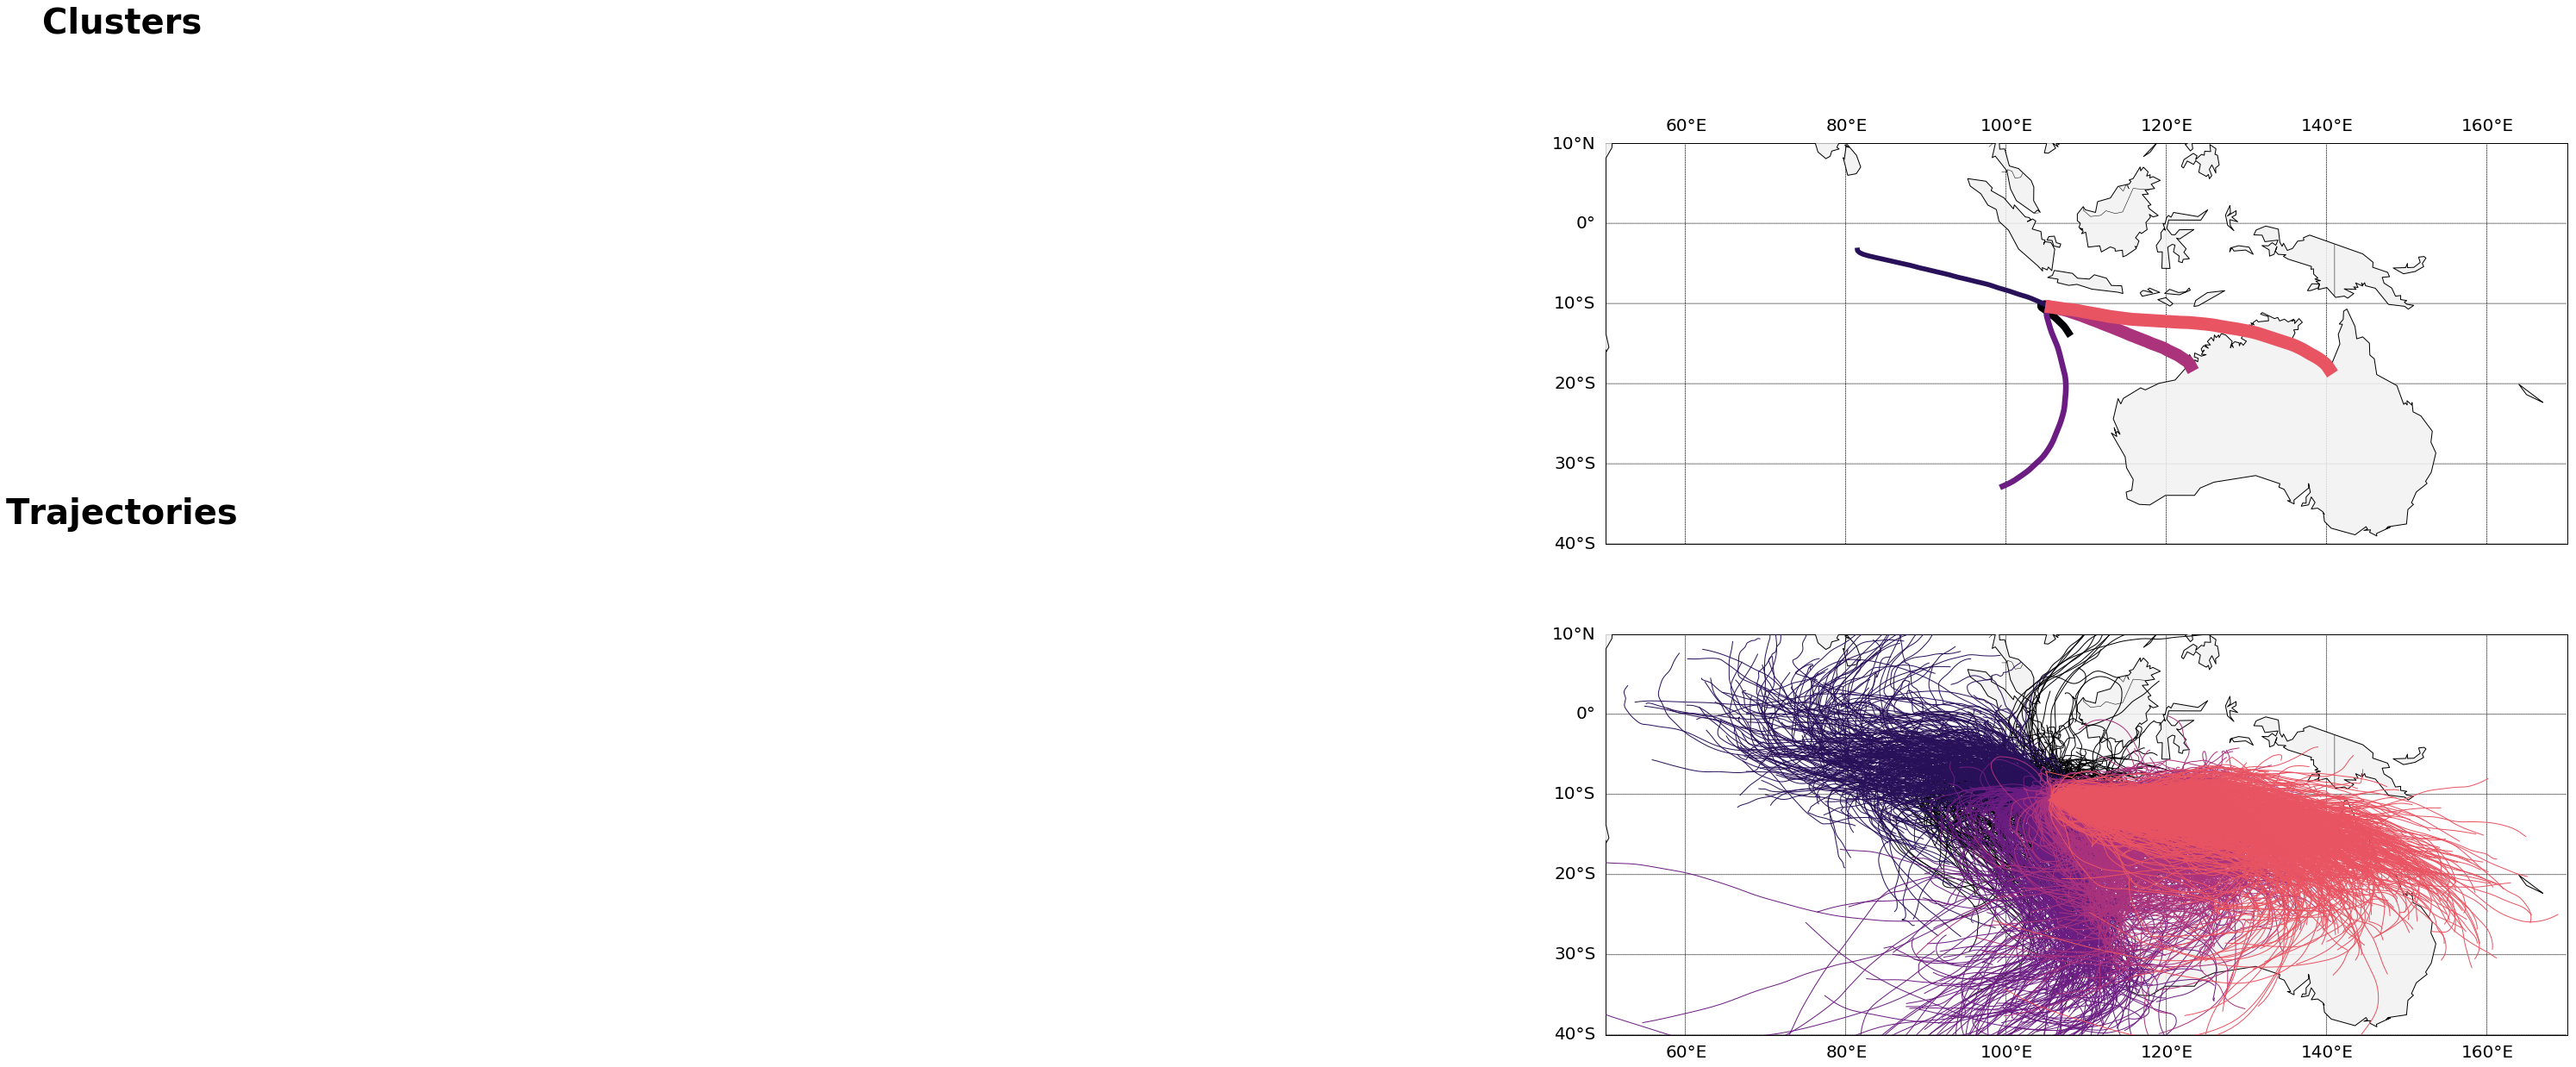

In [26]:
colors = np.linspace(0, 0.95, 7)

mapcorners =  [50, -40, 170, 10]
standard_pm = None
mapdesign0 = py.MapDesign(mapcorners, standard_pm, projection='cyl',
                 mapcolor='light', maplabels=None, area_threshold=10000,
                 resolution='c', zborder=14,
                 zmapbound=10, zlatlon=11, lat_labels=['left'],
                 lon_labels=['top'], latlon_labelspacing=(10, 20),
                 latlon_fs=20, latlon_spacing=(10, 20), drawstates=False,
                 drawoutlines=True, draw_latlons=True, land_alpha=0.85)
mapdesign1 = py.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'])

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20,20))
map0 = mapdesign0.make_basemap(ax=ax0)
map1 = mapdesign1.make_basemap(ax=ax1)

# Text on maps
x, y = map0(-135, 25)
font_params = {'horizontalalignment' : 'center',
               'verticalalignment' : 'center',
               'fontsize' : 40,
               'weight' : 'bold'}

ax0.text(x, y, 'Clusters', **font_params)
ax1.text(x, y, 'Trajectories', **font_params)

for clus, color in zip(clusgroup, colors):
    params = {'zorder' : 24,
    		  'latlon' : True,
    		  'c' : plt.cm.magma(color)}

    map0.plot(*clus.path.xy, lw=(clus.trajcount/clusgroup.trajcount)*50,
    		  **params)

    for traj in clus:
        map1.plot(*traj.path.xy, lw=1, **params)
        
fig.subplots_adjust(hspace=0.1)

/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


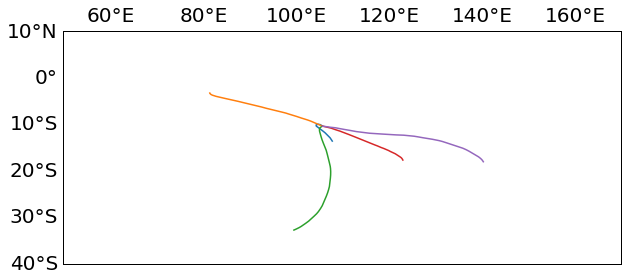

In [28]:
mapcorners =  [50, -40, 170, 10]
standard_pm = None

bmap_params = py.MapDesign(mapcorners, standard_pm, projection='cyl',
                 mapcolor='light', maplabels=None, area_threshold=10000,
                 resolution='c', zborder=14,zmapbound=16, 
                    lat_labels=['left'],
                 lon_labels=['top'], latlon_labelspacing=(10, 20),
                 latlon_fs=20, latlon_spacing=(10, 20), drawstates=False,
                 drawoutlines=True, draw_latlons=True)
bmap = bmap_params.make_basemap()

for traj in clusgroup[::]:
    bmap.plot(*traj.path.xy, latlon=True, zorder=20)
    plt.legend


/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


NameError: name 'boundarymap' is not defined

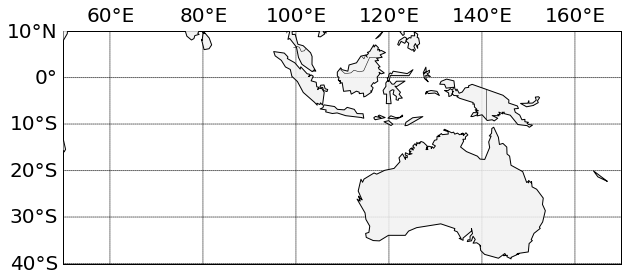

In [29]:
mapcorners =  [50, -40, 170, 10]
standard_pm = None

bmap_params = py.MapDesign(mapcorners, standard_pm, projection='cyl',
                 mapcolor='light', maplabels=None, area_threshold=10000,
                 resolution='c', zborder=14,
                lat_labels=['left'],
                 lon_labels=['top'], latlon_labelspacing=(10, 20),
                 latlon_fs=20, latlon_spacing=(10, 20), drawstates=False,
                 drawoutlines=True, draw_latlons=True)

bmap = bmap_params.make_basemap()
for traj in clusgroup[::]:
    mappable = py.traj_scatter(*traj.path.xy, hymap=boundarymap, latlon=True, zorder=20)
    

In [31]:
for traj in clusgroup[1:2:]:
    print ((traj.data.geometry.apply)

SyntaxError: unexpected EOF while parsing (<ipython-input-31-5ea45718c138>, line 2)

In [32]:
cluster1= clusgroup[0:1:]
cluster2= clusgroup[1:2:]
cluster3= clusgroup[2:3:]
cluster4= clusgroup[3:4:]
cluster5= clusgroup[4:5:]
for traj in cluster2:
    pprint (vars(traj))

{'clusternumber': 2,
 'data':           Timestep  PRESSURE  \
Timestep                       
 0.0           0.0       0.0   
-1.0          -1.0       0.0   
-2.0          -2.0       0.0   
-3.0          -3.0       0.0   
-4.0          -4.0       0.0   
-5.0          -5.0       0.0   
-6.0          -6.0       0.0   
-7.0          -7.0       0.0   
-8.0          -8.0       0.0   
-9.0          -9.0       0.0   
-10.0        -10.0       0.0   
-11.0        -11.0       0.0   
-12.0        -12.0       0.0   
-13.0        -13.0       0.0   
-14.0        -14.0       0.0   
-15.0        -15.0       0.0   
-16.0        -16.0       0.0   
-17.0        -17.0       0.0   
-18.0        -18.0       0.0   
-19.0        -19.0       0.0   
-20.0        -20.0       0.0   
-21.0        -21.0       0.0   
-22.0        -22.0       0.0   
-23.0        -23.0       0.0   
-24.0        -24.0       0.0   
-25.0        -25.0       0.0   
-26.0        -26.0       0.0   
-27.0        -27.0       0.0   
-28.0     

In [33]:
# for traj in cluster1:
#     pprint ((traj[1:100].trajids))
    
Cluster2=cluster2.clusters[0]
# for traj in Cluster2:
#     pprint (vars(traj[1]))

Cluster2

In [38]:
# color_dict = {500.0 : 'blue',
#               1000.0 : 'orange',
#               1500.0 : 'black'}

# for traj in trajgroup:
#     altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
#     traj.trajcolor = color_dict[altitude0]
    


In [39]:
# end = -167

# for traj in clusgroup[1::]:
#     if traj.data.Timestep < end:
#         print (traj.data.geometry)

### Determining the seasonal/monthly structure of the different clusters
- Need to work out if I can still use to trajecotries and if within the clusters is there information about the different cluster Numbers? can I create a cluster which identifies themonth in which the rainfall occurs???
- assign different days to the cluster??


In [40]:
for traj in cluster1:
    pprint (vars(traj))

{'clusternumber': 1,
 'data':           Timestep  PRESSURE                          geometry  \
Timestep                                                         
 0.0           0.0       0.0       POINT Z (105.7 -10.45 1500)   
-1.0          -1.0       0.0  POINT Z (105.698 -10.437 1487.5)   
-2.0          -2.0       0.0  POINT Z (105.695 -10.427 1476.7)   
-3.0          -3.0       0.0   POINT Z (105.689 -10.42 1467.2)   
-4.0          -4.0       0.0  POINT Z (105.682 -10.415 1459.1)   
-5.0          -5.0       0.0   POINT Z (105.671 -10.41 1451.7)   
-6.0          -6.0       0.0  POINT Z (105.656 -10.399 1444.4)   
-7.0          -7.0       0.0  POINT Z (105.636 -10.383 1436.9)   
-8.0          -8.0       0.0   POINT Z (105.61 -10.361 1429.4)   
-9.0          -9.0       0.0   POINT Z (105.58 -10.335 1421.6)   
-10.0        -10.0       0.0  POINT Z (105.545 -10.303 1413.7)   
-11.0        -11.0       0.0  POINT Z (105.509 -10.271 1406.2)   
-12.0        -12.0       0.0  POINT Z (105.476

In [41]:
for traj in cluster2:
    pprint ((traj[2].data.DateTime))

Timestep
 0.0     2000-01-15 04:00:00
-1.0     2000-01-15 03:00:00
-2.0     2000-01-15 02:00:00
-3.0     2000-01-15 01:00:00
-4.0     2000-01-15 00:00:00
-5.0     2000-01-14 23:00:00
-6.0     2000-01-14 22:00:00
-7.0     2000-01-14 21:00:00
-8.0     2000-01-14 20:00:00
-9.0     2000-01-14 19:00:00
-10.0    2000-01-14 18:00:00
-11.0    2000-01-14 17:00:00
-12.0    2000-01-14 16:00:00
-13.0    2000-01-14 15:00:00
-14.0    2000-01-14 14:00:00
-15.0    2000-01-14 13:00:00
-16.0    2000-01-14 12:00:00
-17.0    2000-01-14 11:00:00
-18.0    2000-01-14 10:00:00
-19.0    2000-01-14 09:00:00
-20.0    2000-01-14 08:00:00
-21.0    2000-01-14 07:00:00
-22.0    2000-01-14 06:00:00
-23.0    2000-01-14 05:00:00
-24.0    2000-01-14 04:00:00
-25.0    2000-01-14 03:00:00
-26.0    2000-01-14 02:00:00
-27.0    2000-01-14 01:00:00
-28.0    2000-01-14 00:00:00
-29.0    2000-01-13 23:00:00
                 ...        
-139.0   2000-01-09 09:00:00
-140.0   2000-01-09 08:00:00
-141.0   2000-01-09 07:00:00
-142.

- managed to split the cluster up into the monthly componenets - only problem is that they are now not classified as clusters and have no cluster identity to them

- can i add a column which is inclusive of the cluster number?
- or is it easier to just go of it as it and use this?


In [42]:
#need to determine how to identify which month each of teh trajectories is in?
import fnmatch
import os

jan_C2 = []#test for each of the months
feb_C2 = []
mar_C2 = []
apr_C2 = []
may_C2 = []
jun_C2 = []
jul_C2 = []
aug_C2 = []
sep_C2 = []
oct_C2 = []
nov_C2 = []
dec_C2 = []

for traj in cluster2:
    for i in range(292):
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jan*'):
            jan_C2.append(traj[i])
            #pprint (jan_C2)
        if fnmatch.fnmatch(traj[i].trajid, '*XI20feb*'):
            feb_C2.append(traj[i])
            #pprint (jan_C2)      
        if fnmatch.fnmatch(traj[i].trajid, '*XI20mar*'):
            mar_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20apr*'):
            apr_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20may*'):
            may_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jun*'):
            jun_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jul*'):
            jul_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20aug*'):
            aug_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20sep*'):
            sep_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20oct*'):
            oct_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20nov*'):
            nov_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20dec*'):
            dec_C2.append(traj[i])


        
# making the trajectory lists into a trajectoryGroup so that I can do calculations on them again. 
jan_cluster2= py.TrajectoryGroup(jan_C2)
feb_cluster2= py.TrajectoryGroup(feb_C2)
mar_cluster2= py.TrajectoryGroup(mar_C2)
apr_cluster2= py.TrajectoryGroup(apr_C2)
may_cluster2= py.TrajectoryGroup(may_C2)
jun_cluster2= py.TrajectoryGroup(jun_C2)
jul_cluster2= py.TrajectoryGroup(jul_C2)
aug_cluster2= py.TrajectoryGroup(aug_C2)
sep_cluster2= py.TrajectoryGroup(sep_C2)
oct_cluster2= py.TrajectoryGroup(oct_C2)
nov_cluster2= py.TrajectoryGroup(nov_C2)
dec_cluster2= py.TrajectoryGroup(dec_C2)
#for traj in jan_cluster2:
    #pprint ((traj.trajid))
    #pprint (vars(traj))

dec_cluster2
for traj in jul_cluster2:
    pprint ((traj.trajid))
    #pprint (vars(traj))


'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jul1500winter20160724041.0'


In [43]:
#need to determine how to identify which month each of teh trajectories is in?

jan_C2 = []#test for each of the months
feb_C2 = []
mar_C2 = []
apr_C2 = []
may_C2 = []
jun_C2 = []
jul_C2 = []
aug_C2 = []
sep_C2 = []
oct_C2 = []
nov_C2 = []
dec_C2 = []

for traj in cluster1:
    for i in range(431):
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jan*'):
            jan_C2.append(traj[i])
            #pprint (jan_C2)
        if fnmatch.fnmatch(traj[i].trajid, '*XI20feb*'):
            feb_C2.append(traj[i])
            #pprint (jan_C2)      
        if fnmatch.fnmatch(traj[i].trajid, '*XI20mar*'):
            mar_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20apr*'):
            apr_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20may*'):
            may_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jun*'):
            jun_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jul*'):
            jul_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20aug*'):
            aug_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20sep*'):
            sep_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20oct*'):
            oct_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20nov*'):
            nov_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20dec*'):
            dec_C2.append(traj[i])


        
# making the trajectory lists into a trajectoryGroup so that I can do calculations on them again. 
jan_cluster1= py.TrajectoryGroup(jan_C2)
feb_cluster1= py.TrajectoryGroup(feb_C2)
mar_cluster1= py.TrajectoryGroup(mar_C2)
apr_cluster1= py.TrajectoryGroup(apr_C2)
may_cluster1= py.TrajectoryGroup(may_C2)
jun_cluster1= py.TrajectoryGroup(jun_C2)
jul_cluster1= py.TrajectoryGroup(jul_C2)
aug_cluster1= py.TrajectoryGroup(aug_C2)
sep_cluster1= py.TrajectoryGroup(sep_C2)
oct_cluster1= py.TrajectoryGroup(oct_C2)
nov_cluster1= py.TrajectoryGroup(nov_C2)
dec_cluster1= py.TrajectoryGroup(dec_C2)
#for traj in jan_cluster2:
    #pprint ((traj.trajid))
    #pprint (vars(traj))

dec_cluster1
for traj in jan_cluster1:
    pprint ((traj.trajid))
    #pprint (vars(traj))



'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000101041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000104041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000108041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000111041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000112041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000114041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000129041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20000131041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20010125041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20020107041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20020109041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20020110041.0'
'/Volumes/Seagate_Backup/hysplit4/pygen/XI2/XI20jan1500summer20020124041.0'
'/Volumes/Se

In [44]:

jan_C2 = []#test for each of the months
feb_C2 = []
mar_C2 = []
apr_C2 = []
may_C2 = []
jun_C2 = []
jul_C2 = []
aug_C2 = []
sep_C2 = []
oct_C2 = []
nov_C2 = []
dec_C2 = []

for traj in cluster3:
    for i in range(342):
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jan*'):
            jan_C2.append(traj[i])
            #pprint (jan_C2)
        if fnmatch.fnmatch(traj[i].trajid, '*XI20feb*'):
            feb_C2.append(traj[i])
            #pprint (jan_C2)      
        if fnmatch.fnmatch(traj[i].trajid, '*XI20mar*'):
            mar_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20apr*'):
            apr_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20may*'):
            may_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jun*'):
            jun_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jul*'):
            jul_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20aug*'):
            aug_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20sep*'):
            sep_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20oct*'):
            oct_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20nov*'):
            nov_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20dec*'):
            dec_C2.append(traj[i])


        
# making the trajectory lists into a trajectoryGroup so that I can do calculations on them again. 
jan_cluster3= py.TrajectoryGroup(jan_C2)
feb_cluster3= py.TrajectoryGroup(feb_C2)
mar_cluster3= py.TrajectoryGroup(mar_C2)
apr_cluster3= py.TrajectoryGroup(apr_C2)
may_cluster3= py.TrajectoryGroup(may_C2)
jun_cluster3= py.TrajectoryGroup(jun_C2)
jul_cluster3= py.TrajectoryGroup(jul_C2)
aug_cluster3= py.TrajectoryGroup(aug_C2)
sep_cluster3= py.TrajectoryGroup(sep_C2)
oct_cluster3= py.TrajectoryGroup(oct_C2)
nov_cluster3= py.TrajectoryGroup(nov_C2)
dec_cluster3= py.TrajectoryGroup(dec_C2)
#for traj in jan_cluster2:
    #pprint ((traj.trajid))
    #pprint (vars(traj))

In [45]:

jan_C2 = []#test for each of the months
feb_C2 = []
mar_C2 = []
apr_C2 = []
may_C2 = []
jun_C2 = []
jul_C2 = []
aug_C2 = []
sep_C2 = []
oct_C2 = []
nov_C2 = []
dec_C2 = []

for traj in cluster4:
    for i in range(744):
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jan*'):
            jan_C2.append(traj[i])
            #pprint (jan_C2)
        if fnmatch.fnmatch(traj[i].trajid, '*XI20feb*'):
            feb_C2.append(traj[i])
            #pprint (jan_C2)      
        if fnmatch.fnmatch(traj[i].trajid, '*XI20mar*'):
            mar_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20apr*'):
            apr_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20may*'):
            may_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jun*'):
            jun_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jul*'):
            jul_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20aug*'):
            aug_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20sep*'):
            sep_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20oct*'):
            oct_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20nov*'):
            nov_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20dec*'):
            dec_C2.append(traj[i])


        
# making the trajectory lists into a trajectoryGroup so that I can do calculations on them again. 
jan_cluster4= py.TrajectoryGroup(jan_C2)
feb_cluster4= py.TrajectoryGroup(feb_C2)
mar_cluster4= py.TrajectoryGroup(mar_C2)
apr_cluster4= py.TrajectoryGroup(apr_C2)
may_cluster4= py.TrajectoryGroup(may_C2)
jun_cluster4= py.TrajectoryGroup(jun_C2)
jul_cluster4= py.TrajectoryGroup(jul_C2)
aug_cluster4= py.TrajectoryGroup(aug_C2)
sep_cluster4= py.TrajectoryGroup(sep_C2)
oct_cluster4= py.TrajectoryGroup(oct_C2)
nov_cluster4= py.TrajectoryGroup(nov_C2)
dec_cluster4= py.TrajectoryGroup(dec_C2)
#for traj in jan_cluster2:
    #pprint ((traj.trajid))
    #pprint (vars(traj))

In [46]:

jan_C2 = []#test for each of the months
feb_C2 = []
mar_C2 = []
apr_C2 = []
may_C2 = []
jun_C2 = []
jul_C2 = []
aug_C2 = []
sep_C2 = []
oct_C2 = []
nov_C2 = []
dec_C2 = []

for traj in cluster5:
    for i in range(776):
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jan*'):
            jan_C2.append(traj[i])
            #pprint (jan_C2)
        if fnmatch.fnmatch(traj[i].trajid, '*XI20feb*'):
            feb_C2.append(traj[i])
            #pprint (jan_C2)      
        if fnmatch.fnmatch(traj[i].trajid, '*XI20mar*'):
            mar_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20apr*'):
            apr_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20may*'):
            may_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jun*'):
            jun_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20jul*'):
            jul_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20aug*'):
            aug_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20sep*'):
            sep_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20oct*'):
            oct_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20nov*'):
            nov_C2.append(traj[i])
        if fnmatch.fnmatch(traj[i].trajid, '*XI20dec*'):
            dec_C2.append(traj[i])


        
# making the trajectory lists into a trajectoryGroup so that I can do calculations on them again. 
jan_cluster5= py.TrajectoryGroup(jan_C2)
feb_cluster5= py.TrajectoryGroup(feb_C2)
mar_cluster5= py.TrajectoryGroup(mar_C2)
apr_cluster5= py.TrajectoryGroup(apr_C2)
may_cluster5= py.TrajectoryGroup(may_C2)
jun_cluster5= py.TrajectoryGroup(jun_C2)
jul_cluster5= py.TrajectoryGroup(jul_C2)
aug_cluster5= py.TrajectoryGroup(aug_C2)
sep_cluster5= py.TrajectoryGroup(sep_C2)
oct_cluster5= py.TrajectoryGroup(oct_C2)
nov_cluster5= py.TrajectoryGroup(nov_C2)
dec_cluster5= py.TrajectoryGroup(dec_C2)
#for traj in jan_cluster2:
    #pprint ((traj.trajid))
    #pprint (vars(traj))

## WOrkign out the percentage of each monthly total which is made up by each cluster

- each Month will have a value for each cluster, the total of the cluster and then the percentage of the month which is made up by each individual cluster
    - month_c#_percentage ## refers to the percentage of each month
    - month_c#_Number  ## refers to the absolute value of each month

In [47]:
J_c1_Number=(jan_cluster1.trajcount)
J_c2_Number=(jan_cluster2.trajcount)
J_c3_Number=(jan_cluster3.trajcount)
J_c4_Number=(jan_cluster4.trajcount)
J_c5_Number=(jan_cluster5.trajcount)

Jan_total= J_c1_Number+J_c2_Number+J_c3_Number+J_c4_Number+J_c5_Number
jan_c1_percentage=J_c1_Number/Jan_total*100
jan_c2_percentage=J_c2_Number/Jan_total*100
jan_c3_percentage=J_c3_Number/Jan_total*100
jan_c4_percentage=J_c4_Number/Jan_total*100
jan_c5_percentage=J_c5_Number/Jan_total*100

print ('Percentage of cluster 1 which makes up the total of JAN is equal to - ',jan_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of JAN is equal to - ',jan_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of JAN is equal to - ',jan_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of JAN is equal to - ',jan_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of JAN is equal to - ',jan_c5_percentage)
Jan_total

Percentage of cluster 1 which makes up the total of JAN is equal to -  28.8135593220339
Percentage of cluster 2 which makes up the total of JAN is equal to -  21.01694915254237
Percentage of cluster 3 which makes up the total of JAN is equal to -  29.491525423728817
Percentage of cluster 4 which makes up the total of JAN is equal to -  19.322033898305087
Percentage of cluster 5 which makes up the total of JAN is equal to -  1.3559322033898304


295

In [48]:
F_c1_Number=(feb_cluster1.trajcount)
F_c2_Number=(feb_cluster2.trajcount)
F_c3_Number=(feb_cluster3.trajcount)
F_c4_Number=(feb_cluster4.trajcount)
F_c5_Number=(feb_cluster5.trajcount)

feb_total= F_c1_Number+F_c2_Number+F_c3_Number+F_c4_Number+F_c5_Number
feb_c1_percentage=F_c1_Number/feb_total*100
feb_c2_percentage=F_c2_Number/feb_total*100
feb_c3_percentage=F_c3_Number/feb_total*100
feb_c4_percentage=F_c4_Number/feb_total*100
feb_c5_percentage=F_c5_Number/feb_total*100

print ('Percentage of cluster 1 which makes up the total of FEB is equal to - ',feb_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of FEB is equal to - ',feb_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of FEB is equal to - ',feb_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of FEB is equal to - ',feb_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of FEB is equal to - ',feb_c5_percentage)
feb_total


Percentage of cluster 1 which makes up the total of FEB is equal to -  27.985074626865668
Percentage of cluster 2 which makes up the total of FEB is equal to -  36.56716417910448
Percentage of cluster 3 which makes up the total of FEB is equal to -  19.029850746268657
Percentage of cluster 4 which makes up the total of FEB is equal to -  13.059701492537313
Percentage of cluster 5 which makes up the total of FEB is equal to -  3.3582089552238807


268

In [49]:
M_c1_Number=(mar_cluster1.trajcount)
M_c2_Number=(mar_cluster2.trajcount)
M_c3_Number=(mar_cluster3.trajcount)
M_c4_Number=(mar_cluster4.trajcount)
M_c5_Number=(mar_cluster5.trajcount)

mar_total= M_c1_Number+M_c2_Number+M_c3_Number+M_c4_Number+M_c5_Number
mar_c1_percentage=M_c1_Number/mar_total*100
mar_c2_percentage=M_c2_Number/mar_total*100
mar_c3_percentage=M_c3_Number/mar_total*100
mar_c4_percentage=M_c4_Number/mar_total*100
mar_c5_percentage=M_c5_Number/mar_total*100

print ('Percentage of cluster 1 which makes up the total of MAR is equal to - ',mar_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of MAR is equal to - ',mar_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of MAR is equal to - ',mar_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of MAR is equal to - ',mar_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of MAR is equal to - ',mar_c5_percentage)
mar_total


Percentage of cluster 1 which makes up the total of MAR is equal to -  21.98581560283688
Percentage of cluster 2 which makes up the total of MAR is equal to -  23.75886524822695
Percentage of cluster 3 which makes up the total of MAR is equal to -  14.893617021276595
Percentage of cluster 4 which makes up the total of MAR is equal to -  23.404255319148938
Percentage of cluster 5 which makes up the total of MAR is equal to -  15.957446808510639


282

In [50]:
A_c1_Number=(apr_cluster1.trajcount)
A_c2_Number=(apr_cluster2.trajcount)
A_c3_Number=(apr_cluster3.trajcount)
A_c4_Number=(apr_cluster4.trajcount)
A_c5_Number=(apr_cluster5.trajcount)

apr_total= A_c1_Number+A_c2_Number+A_c3_Number+A_c4_Number+A_c5_Number
apr_c1_percentage=A_c1_Number/apr_total*100
apr_c2_percentage=A_c2_Number/apr_total*100
apr_c3_percentage=A_c3_Number/apr_total*100
apr_c4_percentage=A_c4_Number/apr_total*100
apr_c5_percentage=A_c5_Number/apr_total*100

print ('Percentage of cluster 1 which makes up the total of APR is equal to - ',apr_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of APR is equal to - ',apr_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of APR is equal to - ',apr_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of APR is equal to - ',apr_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of APR is equal to - ',apr_c5_percentage)
apr_total


Percentage of cluster 1 which makes up the total of APR is equal to -  11.96911196911197
Percentage of cluster 2 which makes up the total of APR is equal to -  9.652509652509652
Percentage of cluster 3 which makes up the total of APR is equal to -  1.9305019305019304
Percentage of cluster 4 which makes up the total of APR is equal to -  27.413127413127413
Percentage of cluster 5 which makes up the total of APR is equal to -  49.034749034749034


259

In [51]:
M_c1_Number=(may_cluster1.trajcount)
M_c2_Number=(may_cluster2.trajcount)
M_c3_Number=(may_cluster3.trajcount)
M_c4_Number=(may_cluster4.trajcount)
M_c5_Number=(may_cluster5.trajcount)

may_total= M_c1_Number+M_c2_Number+M_c3_Number+M_c4_Number+M_c5_Number
may_c1_percentage=M_c1_Number/may_total*100
may_c2_percentage=M_c2_Number/may_total*100
may_c3_percentage=M_c3_Number/may_total*100
may_c4_percentage=M_c4_Number/may_total*100
may_c5_percentage=M_c5_Number/may_total*100

print ('Percentage of cluster 1 which makes up the total of MAY is equal to - ',may_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of MAY is equal to - ',may_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of MAY is equal to - ',may_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of MAY is equal to - ',may_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of MAY is equal to - ',may_c5_percentage)
may_total


Percentage of cluster 1 which makes up the total of MAY is equal to -  8.653846153846153
Percentage of cluster 2 which makes up the total of MAY is equal to -  2.564102564102564
Percentage of cluster 3 which makes up the total of MAY is equal to -  6.41025641025641
Percentage of cluster 4 which makes up the total of MAY is equal to -  29.166666666666668
Percentage of cluster 5 which makes up the total of MAY is equal to -  53.205128205128204


312

In [52]:
J_c1_Number=(jun_cluster1.trajcount)
J_c2_Number=(jun_cluster2.trajcount)
J_c3_Number=(jun_cluster3.trajcount)
J_c4_Number=(jun_cluster4.trajcount)
J_c5_Number=(jun_cluster5.trajcount)

jun_total= J_c1_Number+J_c2_Number+J_c3_Number+J_c4_Number+J_c5_Number
jun_c1_percentage=J_c1_Number/jun_total*100
jun_c2_percentage=J_c2_Number/jun_total*100
jun_c3_percentage=J_c3_Number/jun_total*100
jun_c4_percentage=J_c4_Number/jun_total*100
jun_c5_percentage=J_c5_Number/jun_total*100

print ('Percentage of cluster 1 which makes up the total of JUN is equal to - ',jun_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of JUN is equal to - ',jun_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of JUN is equal to - ',jun_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of JUN is equal to - ',jun_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of JUN is equal to - ',jun_c5_percentage)
jun_total


Percentage of cluster 1 which makes up the total of JUN is equal to -  5.88235294117647
Percentage of cluster 2 which makes up the total of JUN is equal to -  1.7301038062283738
Percentage of cluster 3 which makes up the total of JUN is equal to -  4.1522491349480966
Percentage of cluster 4 which makes up the total of JUN is equal to -  34.602076124567475
Percentage of cluster 5 which makes up the total of JUN is equal to -  53.63321799307958


289

In [53]:
J_c1_Number=(jul_cluster1.trajcount)
J_c2_Number=(jul_cluster2.trajcount)
J_c3_Number=(jul_cluster3.trajcount)
J_c4_Number=(jul_cluster4.trajcount)
J_c5_Number=(jul_cluster5.trajcount)

jul_total= J_c1_Number+J_c2_Number+J_c3_Number+J_c4_Number+J_c5_Number
jul_c1_percentage=J_c1_Number/jul_total*100
jul_c2_percentage=J_c2_Number/jul_total*100
jul_c3_percentage=J_c3_Number/jul_total*100
jul_c4_percentage=J_c4_Number/jul_total*100
jul_c5_percentage=J_c5_Number/jul_total*100

print ('Percentage of cluster 1 which makes up the total of JUL is equal to - ',jul_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of JUL is equal to - ',jul_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of JUL is equal to - ',jul_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of JUL is equal to - ',jul_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of JUL is equal to - ',jul_c5_percentage)
jul_total


Percentage of cluster 1 which makes up the total of JUL is equal to -  2.5974025974025974
Percentage of cluster 2 which makes up the total of JUL is equal to -  0.4329004329004329
Percentage of cluster 3 which makes up the total of JUL is equal to -  6.0606060606060606
Percentage of cluster 4 which makes up the total of JUL is equal to -  39.82683982683983
Percentage of cluster 5 which makes up the total of JUL is equal to -  51.082251082251084


231

In [54]:
A_c1_Number=(aug_cluster1.trajcount)
A_c2_Number=(aug_cluster2.trajcount)
A_c3_Number=(aug_cluster3.trajcount)
A_c4_Number=(aug_cluster4.trajcount)
A_c5_Number=(aug_cluster5.trajcount)

aug_total= A_c1_Number+A_c2_Number+A_c3_Number+A_c4_Number+A_c5_Number
aug_c1_percentage=A_c1_Number/aug_total*100
aug_c2_percentage=A_c2_Number/aug_total*100
aug_c3_percentage=A_c3_Number/aug_total*100
aug_c4_percentage=A_c4_Number/aug_total*100
aug_c5_percentage=A_c5_Number/aug_total*100

print ('Percentage of cluster 1 which makes up the total of AUG is equal to - ',aug_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of AUG is equal to - ',aug_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of AUG is equal to - ',aug_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of AUG is equal to - ',aug_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of AUG is equal to - ',aug_c5_percentage)
aug_total


Percentage of cluster 1 which makes up the total of AUG is equal to -  1.5873015873015872
Percentage of cluster 2 which makes up the total of AUG is equal to -  3.1746031746031744
Percentage of cluster 3 which makes up the total of AUG is equal to -  4.761904761904762
Percentage of cluster 4 which makes up the total of AUG is equal to -  40.476190476190474
Percentage of cluster 5 which makes up the total of AUG is equal to -  50.0


126

In [55]:
S_c1_Number=(sep_cluster1.trajcount)
S_c2_Number=(sep_cluster2.trajcount)
S_c3_Number=(sep_cluster3.trajcount)
S_c4_Number=(sep_cluster4.trajcount)
S_c5_Number=(sep_cluster5.trajcount)

sep_total= S_c1_Number+S_c2_Number+S_c3_Number+S_c4_Number+S_c5_Number
sep_c1_percentage=S_c1_Number/sep_total*100
sep_c2_percentage=S_c2_Number/sep_total*100
sep_c3_percentage=S_c3_Number/sep_total*100
sep_c4_percentage=S_c4_Number/sep_total*100
sep_c5_percentage=S_c5_Number/sep_total*100

print ('Percentage of cluster 1 which makes up the total of SEP is equal to - ',sep_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of SEP is equal to - ',sep_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of SEP is equal to - ',sep_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of SEP is equal to - ',sep_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of SEP is equal to - ',sep_c5_percentage)
sep_total


Percentage of cluster 1 which makes up the total of SEP is equal to -  7.000000000000001
Percentage of cluster 2 which makes up the total of SEP is equal to -  1.0
Percentage of cluster 3 which makes up the total of SEP is equal to -  11.0
Percentage of cluster 4 which makes up the total of SEP is equal to -  45.0
Percentage of cluster 5 which makes up the total of SEP is equal to -  36.0


100

In [56]:
O_c1_Number=(oct_cluster1.trajcount)
O_c2_Number=(oct_cluster2.trajcount)
O_c3_Number=(oct_cluster3.trajcount)
O_c4_Number=(oct_cluster4.trajcount)
O_c5_Number=(oct_cluster5.trajcount)

oct_total= O_c1_Number+O_c2_Number+O_c3_Number+O_c4_Number+O_c5_Number
oct_c1_percentage=O_c1_Number/oct_total*100
oct_c2_percentage=O_c2_Number/oct_total*100
oct_c3_percentage=O_c3_Number/oct_total*100
oct_c4_percentage=O_c4_Number/oct_total*100
oct_c5_percentage=O_c5_Number/oct_total*100

print ('Percentage of cluster 1 which makes up the total of OCT is equal to - ',oct_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of OCT is equal to - ',oct_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of OCT is equal to - ',oct_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of OCT is equal to - ',oct_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of OCT is equal to - ',oct_c5_percentage)
oct_total


Percentage of cluster 1 which makes up the total of OCT is equal to -  28.57142857142857
Percentage of cluster 2 which makes up the total of OCT is equal to -  1.0204081632653061
Percentage of cluster 3 which makes up the total of OCT is equal to -  5.1020408163265305
Percentage of cluster 4 which makes up the total of OCT is equal to -  39.795918367346935
Percentage of cluster 5 which makes up the total of OCT is equal to -  25.510204081632654


98

In [57]:
N_c1_Number=(nov_cluster1.trajcount)
N_c2_Number=(nov_cluster2.trajcount)
N_c3_Number=(nov_cluster3.trajcount)
N_c4_Number=(nov_cluster4.trajcount)
N_c5_Number=(nov_cluster5.trajcount)

nov_total= N_c1_Number+N_c2_Number+N_c3_Number+N_c4_Number+N_c5_Number
nov_c1_percentage=N_c1_Number/nov_total*100
nov_c2_percentage=N_c2_Number/nov_total*100
nov_c3_percentage=N_c3_Number/nov_total*100
nov_c4_percentage=N_c4_Number/nov_total*100
nov_c5_percentage=N_c5_Number/nov_total*100

print ('Percentage of cluster 1 which makes up the total of NOV is equal to - ',nov_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of NOV is equal to - ',nov_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of NOV is equal to - ',nov_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of NOV is equal to - ',nov_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of NOV is equal to - ',nov_c5_percentage)
nov_total


Percentage of cluster 1 which makes up the total of NOV is equal to -  23.275862068965516
Percentage of cluster 2 which makes up the total of NOV is equal to -  0.0
Percentage of cluster 3 which makes up the total of NOV is equal to -  25.0
Percentage of cluster 4 which makes up the total of NOV is equal to -  37.06896551724138
Percentage of cluster 5 which makes up the total of NOV is equal to -  14.655172413793101


116

In [58]:
D_c1_Number=(dec_cluster1.trajcount)
D_c2_Number=(dec_cluster2.trajcount)
D_c3_Number=(dec_cluster3.trajcount)
D_c4_Number=(dec_cluster4.trajcount)
D_c5_Number=(dec_cluster5.trajcount)

dec_total= D_c1_Number+D_c2_Number+D_c3_Number+D_c4_Number+D_c5_Number
dec_c1_percentage=D_c1_Number/dec_total*100
dec_c2_percentage=D_c2_Number/dec_total*100
dec_c3_percentage=D_c3_Number/dec_total*100
dec_c4_percentage=D_c4_Number/dec_total*100
dec_c5_percentage=D_c5_Number/dec_total*100

print ('Percentage of cluster 1 which makes up the total of DEC is equal to - ',dec_c1_percentage)
print ('Percentage of cluster 2 which makes up the total of DEC is equal to - ',dec_c2_percentage)
print ('Percentage of cluster 3 which makes up the total of DEC is equal to - ',dec_c3_percentage)
print ('Percentage of cluster 4 which makes up the total of DEC is equal to - ',dec_c4_percentage)
print ('Percentage of cluster 5 which makes up the total of DEC is equal to - ',dec_c5_percentage)
dec_total


Percentage of cluster 1 which makes up the total of DEC is equal to -  30.62200956937799
Percentage of cluster 2 which makes up the total of DEC is equal to -  9.569377990430622
Percentage of cluster 3 which makes up the total of DEC is equal to -  28.708133971291865
Percentage of cluster 4 which makes up the total of DEC is equal to -  25.837320574162682
Percentage of cluster 5 which makes up the total of DEC is equal to -  5.263157894736842


209

### Import the rainfall BoM Data from notebook - BoM Data Download

- want to connect the rainfall to the months, and the cluster that the rainfall occurs in. 
- this will be connected to the clsuter map which will be made

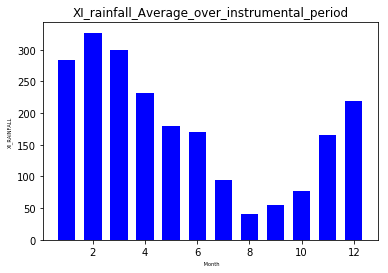

In [59]:
%store -r ds_XI_rainfall_month_av
width = 1/1.5
plt.bar(ds_XI_rainfall_month_av.index,ds_XI_rainfall_month_av.Rainfall,width,color='blue')
plt.xlabel(' Month', fontsize=5)
plt.ylabel('XI_RAINFALL', fontsize=5)
plt.title('XI_rainfall_Average_over_instrumental_period')
plt.show()

In [60]:
ds_XI_rainfall_month_av['Date_Range']=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
ds_XI_rainfall_month_av.index=ds_XI_rainfall_month_av['Date_Range']
ds_XI_rainfall_month_av.drop('Date_Range', axis=1)

Rainfall_monthly = {'Rainfall': pd.Series(['283.561702','326.976596','299.056522','231.084783','179.017391','170.906522','94.576087','40.828261','55.130435','77.652174','164.889130', '218.476087'], index= ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])}
Rainfall_monthly_BoM = pd.DataFrame(Rainfall_monthly,dtype = np.float64)
Rainfall_monthly_BoM
Rainfall_monthly_BoM

,Rainfall
Jan,283.561702
Feb,326.976596
Mar,299.056522
Apr,231.084783
May,179.017391
Jun,170.906522
July,94.576087
Aug,40.828261
Sep,55.130435
Oct,77.652174


In [61]:
Rainfall_monthly_BoM.dtypes

Rainfall    float64
dtype: object

In [62]:
percentages = {'C1': pd.Series([jan_c1_percentage, feb_c1_percentage, mar_c1_percentage,apr_c1_percentage,may_c1_percentage,jun_c1_percentage,jul_c1_percentage,aug_c1_percentage,sep_c1_percentage,oct_c1_percentage, nov_c1_percentage, dec_c1_percentage],index=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']),
               'C2': pd.Series([jan_c2_percentage, feb_c2_percentage, mar_c2_percentage,apr_c2_percentage,may_c2_percentage,jun_c2_percentage,jul_c2_percentage,aug_c2_percentage,sep_c2_percentage,oct_c2_percentage, nov_c2_percentage, dec_c2_percentage],index=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']),
               'C3': pd.Series([jan_c3_percentage, feb_c3_percentage, mar_c3_percentage,apr_c3_percentage,may_c3_percentage,jun_c3_percentage,jul_c3_percentage,aug_c3_percentage,sep_c3_percentage,oct_c3_percentage, nov_c3_percentage, dec_c3_percentage],index=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']),
               'C4': pd.Series([jan_c4_percentage, feb_c4_percentage, mar_c4_percentage,apr_c4_percentage,may_c4_percentage,jun_c4_percentage,jul_c4_percentage,aug_c4_percentage,sep_c4_percentage,oct_c4_percentage, nov_c4_percentage, dec_c4_percentage],index=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']),
               'C5': pd.Series([jan_c5_percentage, feb_c5_percentage, mar_c5_percentage,apr_c5_percentage,may_c5_percentage,jun_c5_percentage,jul_c5_percentage,aug_c5_percentage,sep_c5_percentage,oct_c5_percentage, nov_c5_percentage, dec_c5_percentage],index=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])}

Percentages_of_clusters=pd.DataFrame(percentages)
Percentages_of_clusters=Percentages_of_clusters/100
Percentages_of_clusters=Percentages_of_clusters
Percentages_of_clusters


,C1,C2,C3,C4,C5
Jan,0.288136,0.210169,0.294915,0.193220,0.013559
Feb,0.279851,0.365672,0.190299,0.130597,0.033582
Mar,0.219858,0.237589,0.148936,0.234043,0.159574
Apr,0.119691,0.096525,0.019305,0.274131,0.490347
May,0.086538,0.025641,0.064103,0.291667,0.532051
Jun,0.058824,0.017301,0.041522,0.346021,0.536332
July,0.025974,0.004329,0.060606,0.398268,0.510823
Aug,0.015873,0.031746,0.047619,0.404762,0.500000
Sep,0.070000,0.010000,0.110000,0.450000,0.360000
Oct,0.285714,0.010204,0.051020,0.397959,0.255102


In [63]:
ClusterValues_C1=Percentages_of_clusters['C1']*(Rainfall_monthly_BoM['Rainfall'])
ClusterValues_C2=Percentages_of_clusters['C2']*(Rainfall_monthly_BoM['Rainfall'])
ClusterValues_C3=Percentages_of_clusters['C3']*(Rainfall_monthly_BoM['Rainfall'])
ClusterValues_C4=Percentages_of_clusters['C4']*(Rainfall_monthly_BoM['Rainfall'])
ClusterValues_C5=Percentages_of_clusters['C5']*(Rainfall_monthly_BoM['Rainfall'])

In [64]:
Rainfall_monthly_BoM['Cluster_1']=ClusterValues_C1
Rainfall_monthly_BoM['Cluster_2']=ClusterValues_C2
Rainfall_monthly_BoM['Cluster_3']=ClusterValues_C3
Rainfall_monthly_BoM['Cluster_4']=ClusterValues_C4
Rainfall_monthly_BoM['Cluster_5']=ClusterValues_C5
Rainfall_monthly_BoM

,Rainfall,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
Jan,283.561702,81.704219,59.596019,83.626671,54.789888,3.844904
Feb,326.976596,91.504644,119.566069,62.223158,42.702167,10.980557
Mar,299.056522,65.750015,71.052436,44.540333,69.991952,47.721785
Apr,231.084783,27.658796,22.305481,4.461096,63.347566,113.311843
May,179.017391,15.491890,4.590190,11.475474,52.213406,95.246432
Jun,170.906522,10.053325,2.956860,7.096465,59.137205,91.662668
July,94.576087,2.456522,0.409420,5.731884,37.666667,48.311594
Aug,40.828261,0.648068,1.296135,1.944203,16.525725,20.414130
Sep,55.130435,3.859130,0.551304,6.064348,24.808696,19.846957
Oct,77.652174,22.186335,0.792369,3.961846,30.902396,19.809228


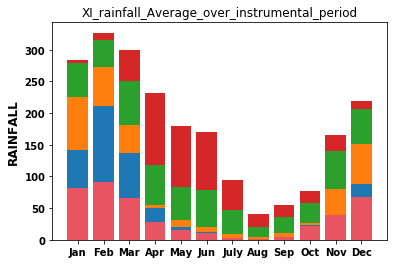

In [73]:
width = 1/1.5
c=plt.cm.magma(color)
bars=np.array(Rainfall_monthly_BoM.Rainfall)
r=[1,2,3,4,5,6,7,8,9,10,11,12]
names=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']
bars1=np.array(Rainfall_monthly_BoM.Cluster_1)
bars2=np.array(Rainfall_monthly_BoM.Cluster_2)
bars3=np.array(Rainfall_monthly_BoM.Cluster_3)
bars4=np.array(Rainfall_monthly_BoM.Cluster_4)
bars5=np.array(Rainfall_monthly_BoM.Cluster_5)


plt.bar(r,bars1,color=plt.cm.magma(color))
plt.bar(r,bars2,bottom = bars1)
plt.bar(r,bars3,bottom = bars1+bars2)
plt.bar(r,bars4,bottom = bars1+bars2+bars3)
plt.bar(r,bars5,bottom = bars1+bars2+bars3+bars4)

plt.xticks(r, names, fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('RAINFALL', fontsize=12, fontweight='bold')
plt.title('XI_rainfall_Average_over_instrumental_period')
plt.show()



/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


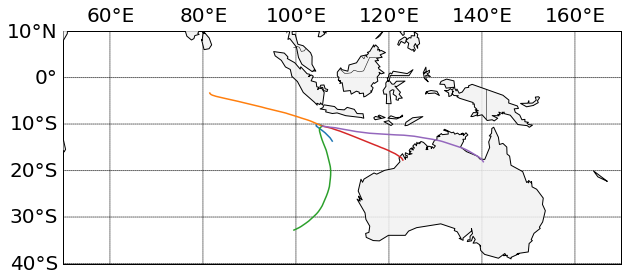

In [66]:
mapcorners =  [50, -40, 170, 10]
standard_pm = None

bmap_params = py.MapDesign(mapcorners, standard_pm, projection='cyl',
                 mapcolor='light', maplabels=None, area_threshold=10000,
                 resolution='c', zborder=14,
                lat_labels=['left'],
                 lon_labels=['top'], latlon_labelspacing=(10, 20),
                 latlon_fs=20, latlon_spacing=(10, 20), drawstates=False,
                 drawoutlines=True, draw_latlons=True)
bmap = bmap_params.make_basemap()
for traj in clusgroup[::]:
    bmap.plot(*traj.path.xy, latlon=True, zorder=20)
    
    


/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jessicahargreaves/anaconda3/envs/pysplitenv36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


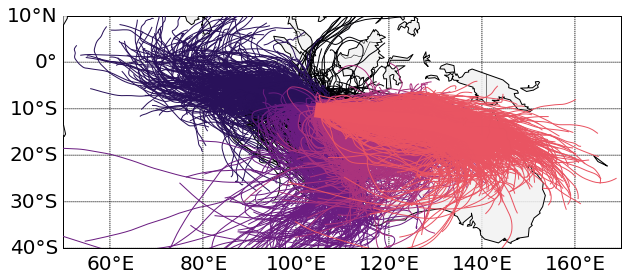

In [74]:
colors = np.linspace(0, 0.95, 7)

mapcorners =  [50, -40, 170, 10]
standard_pm = None
mapdesign0 = py.MapDesign(mapcorners, standard_pm, projection='cyl',
                 mapcolor='light', maplabels=None, area_threshold=10000,
                 resolution='c', zborder=14,
                 zmapbound=10, zlatlon=11, lat_labels=['left'],
                 lon_labels=['bottom'], latlon_labelspacing=(10, 20),
                 latlon_fs=20, latlon_spacing=(10, 20), drawstates=False,
                 drawoutlines=True, draw_latlons=True, land_alpha=0.85)
#mapdesign1 = py.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'])

map0 = mapdesign0.make_basemap()
#map1 = mapdesign1.make_basemap(ax=ax1)

# Text on maps
x, y = map0(-135, 25)
font_params = {'horizontalalignment' : 'center',
               'verticalalignment' : 'center',
               'fontsize' : 40,
               'weight' : 'bold'}

ax0.text(x, y, 'Clusters', **font_params)
ax1.text(x, y, 'Trajectories', **font_params)

for clus, color in zip(clusgroup, colors):
    params = {'zorder' : 24,
    		  'latlon' : True,
    		  'c' : plt.cm.magma(color)}

    map0.plot(*clus.path.xy, lw=(clus.trajcount/clusgroup.trajcount)*50,
    		  **params)
    for traj in clus:
           map0.plot(*traj.path.xy, lw=1, **params)
    
    
# for clus, color in zip(clusgroup, colors):
#     params = {'zorder' : 24,
#     		  'latlon' : True,
#     		  'c' : plt.cm.magma(color)}
    
    #for traj in clus:
      #  map0.plot(*traj.path.xy, lw=1, **params)
        
# fig.subplots_adjust(hspace=0.1)
